<a href="https://colab.research.google.com/github/preeti13456/dlaicourse/blob/master/CNN_AND_POOLING2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [0]:

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True



In [0]:
mnist = tf.keras.datasets.fashion_mnist

In [0]:
(training_images, training_labels) , (test_images, test_labels) = mnist.load_data()

In [0]:
training_images = training_images.reshape(60000, 28, 28, 1)

In [0]:
training_images = training_images/255.0

In [0]:
test_images = test_images.reshape(10000, 28, 28, 1)

In [0]:
test_images = test_images/255.0

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               73856     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 75,306
Trainable params: 75,306
Non-trainable params: 0
__________________________________________________

In [45]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 24s 393us/sample - loss: 0.4955 - acc: 0.8228
Epoch 2/5
60000/60000 [==============================] - 24s 392us/sample - loss: 0.3483 - acc: 0.8749
Epoch 3/5
60000/60000 [==============================] - 23s 388us/sample - loss: 0.3089 - acc: 0.8871
Epoch 4/5
60000/60000 [==============================] - 23s 385us/sample - loss: 0.2829 - acc: 0.8962
Epoch 5/5
60000/60000 [==============================] - 23s 391us/sample - loss: 0.2619 - acc: 0.9029


In [46]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 184us/sample - loss: 0.3115 - acc: 0.8831


In [47]:
print(test_acc)

0.8831


In [48]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


IndexError: ignored

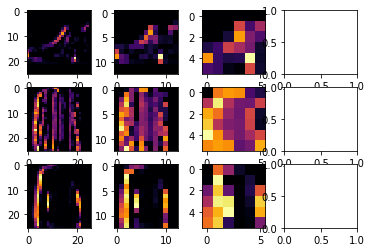

In [49]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 4
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)